In [4]:
#Adding The Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
#Loading The Dataset
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Finding Null Values
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
le=LabelEncoder()
data['diagnosis']=le.fit_transform(data['diagnosis'])

In [6]:
#drop unnecessary columns like id and unnamed
# Drop ID column if exists
#df = data.drop(columns=['id'], errors='ignore')

# Drop unnamed column if exists
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


In [7]:
#Understand The Stucture of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#Split the Data Sets into Train Test and Split Data
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)


In [10]:
# Normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
#Step 2: Train Models – Decision Tree, KNN, and Naïve Bayes
from sklearn.tree import DecisionTreeClassifier
#Initialize Test and Train
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
#Prediction
dt_preds=dt_model.predict(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this later
knn_model.fit(X_train, y_train)

# Predict
knn_preds = knn_model.predict(X_test)


In [14]:
#KNearest Neighbours Classification - Logic from the scratch
#Calculate distance (Euclidean)
#Find k-nearest neighbors
#Perform majority vote
#Predict for each test sample
import numpy as np
from collections import Counter

# Function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Custom KNN Classifier
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k neighbors
        k_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]


In [15]:
# Convert to NumPy arrays if not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Initialize and train custom KNN
my_knn = KNN(k=5)
my_knn.fit(X_train_np, y_train_np)

# Predict
knn_scratch_preds = my_knn.predict(X_test_np)


In [16]:
from sklearn.metrics import accuracy_score

# Accuracy of our custom KNN
acc = accuracy_score(y_test_np, knn_scratch_preds)
print(f"Custom KNN Accuracy: {acc:.4f}")


Custom KNN Accuracy: 0.9561


In [17]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
nb_preds = nb_model.predict(X_test)

In [18]:
#Step 3: Model Evaluation
#Accuracy
#Precision
#Recall
#F1 Score
#Confusion Matrix (with heatmap)



In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [20]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n {model_name} Performance:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    # Plot confusion matrix heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



 Decision Tree Performance:
Accuracy : 0.9211
Precision: 0.9024
Recall   : 0.8810
F1 Score : 0.8916


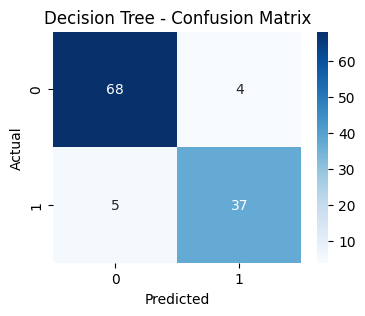


 K-Nearest Neighbors Performance:
Accuracy : 0.9561
Precision: 0.9744
Recall   : 0.9048
F1 Score : 0.9383


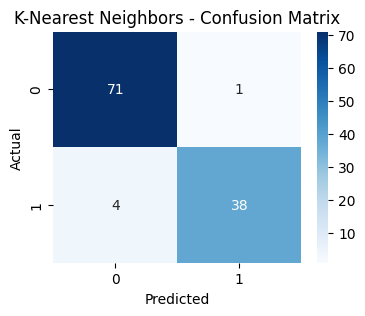


 Naïve Bayes Performance:
Accuracy : 0.9211
Precision: 0.9231
Recall   : 0.8571
F1 Score : 0.8889


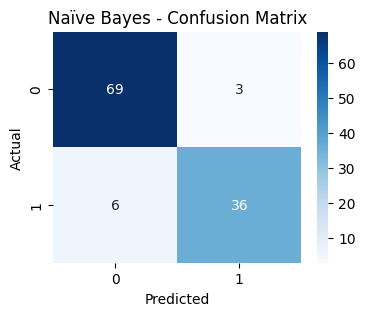


 Custom KNN (from Scratch) Performance:
Accuracy : 0.9561
Precision: 0.9744
Recall   : 0.9048
F1 Score : 0.9383


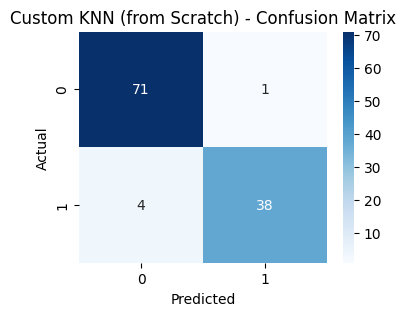

In [23]:
# Decision Tree
evaluate_model(y_test, dt_preds, "Decision Tree")

# KNN
evaluate_model(y_test, knn_preds, "K-Nearest Neighbors")

# Naive Bayes
evaluate_model(y_test, nb_preds, "Naïve Bayes")

# If you used your own custom KNN:
evaluate_model(y_test_np, knn_scratch_preds, "Custom KNN (from Scratch)")


In [24]:
#Comparison table
models = ["Decision Tree", "KNN", "Naive Bayes"]
predictions = [dt_preds, knn_preds, nb_preds]

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for name, preds in zip(models, predictions):
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, preds))
    results["Precision"].append(precision_score(y_test, preds))
    results["Recall"].append(recall_score(y_test, preds))
    results["F1 Score"].append(f1_score(y_test, preds))

pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.921053,0.902439,0.880952,0.891566
1,KNN,0.956140,0.974359,0.904762,0.938272
2,Naive Bayes,0.921053,0.923077,0.857143,0.888889


In [25]:
#Interpretations and Insights

#Analyze the confusion matrix to understand the classification performance across different classes.
#Discuss any misclassifications and potential reasons for these errors.
cm = confusion_matrix(y_test, dt_preds)
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")



Confusion Matrix Breakdown:
True Negatives (TN): 68
False Positives (FP): 4
False Negatives (FN): 5
True Positives (TP): 37


In [26]:
cm = confusion_matrix(y_test, knn_preds)
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")



Confusion Matrix Breakdown:
True Negatives (TN): 71
False Positives (FP): 1
False Negatives (FN): 4
True Positives (TP): 38


In [27]:
cm = confusion_matrix(y_test, nb_preds)
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")



Confusion Matrix Breakdown:
True Negatives (TN): 69
False Positives (FP): 3
False Negatives (FN): 6
True Positives (TP): 36


In [ ]:
#True Positives (TP): Malignant correctly classified as malignant
#True Negatives (TN): Benign correctly classified as benign
#False Positives (FP): Benign incorrectly classified as malignant (false alarm)
#False Negatives (FN): Malignant incorrectly classified as benign (most dangerous!)

In [ ]:
#False Positives (FP) → Unnecessary stress or further medical testing for healthy patients
#False Negatives (FN) → Dangerous! Cancer cases may go undetected
#So, in medical applications, minimizing FN (False Negatives) is usually more important than even accuracy.
#From the above Classification models KNearest_Neighbours Has the minimum FN and FP Value.